# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [5]:
X = df[['p1', 'p2']].values

A = np.array([[0.5, 0.5], [1, -1]]) #matriz de tranformaçao

Y = X @ A.T 

df_transformado = pd.DataFrame(Y, columns=['mean', 'diff'])
df_transformado.head()

,mean,diff
0,7.454060,-0.978736
1,3.980465,-2.238143
2,1.621472,1.294085
3,4.993754,1.038788
4,8.066546,-1.743712


In [7]:
corr_original = df['p1'].corr(df['p2'])
corr_original

0.8957365818728046

In [9]:
corr_transformada = df_transformado['mean'].corr(df_transformado['diff'])
corr_transformada

-0.13347385411788837

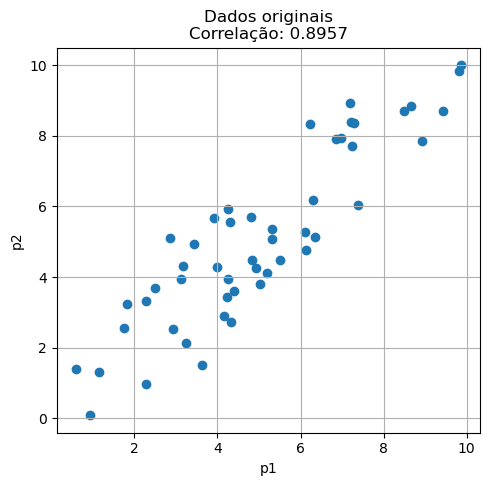

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['p1'], df['p2'])
plt.title(f'Dados originais\nCorrelação: {corr_original:.4f}')
plt.xlabel('p1')
plt.ylabel('p2')
plt.grid(True)

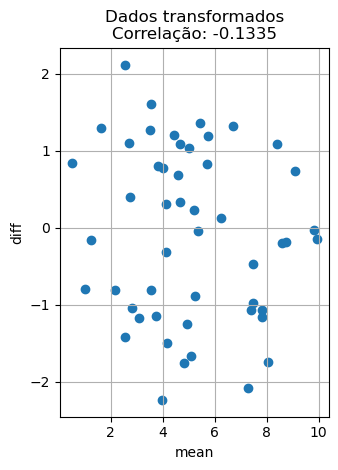

In [15]:
plt.subplot(1, 2, 2)
plt.scatter(df_transformado['mean'], df_transformado['diff'])
plt.title(f'Dados transformados\nCorrelação: {corr_transformada:.4f}')
plt.xlabel('mean')
plt.ylabel('diff')
plt.grid(True)
plt.tight_layout()
plt.show()


A correlação entre p1 e p2 é alta e positiva . Isso ocorreu porque os dados foram gerados com as notas p2 sendo baseadas em p1 mais algum ruído aleatório, então elas são naturalmente correlacionadas.

A correlação entre a média e a diferença se torna muito mais próxima de zero. Esta é uma propriedade fundamental desta transformação linear específica, ela descorrelaciona os dados, tornando as duas novas variáveis estatisticamente mais independentes. A média representa o nível de desempenho geral de cada aluno, enquanto a diferença reflete a variação entre os dois exames.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [ ]:
B = np.array([[1, 1], [1, -1]]) # nova matriz de transformação

Z = X @ B.T

df_soma_dif = pd.DataFrame(Z, columns=['sum', 'diff'])

df_soma_dif.head()

,sum,diff
0,14.908120,-0.978736
1,7.960930,-2.238143
2,3.242944,1.294085
3,9.987507,1.038788
4,16.133092,-1.743712


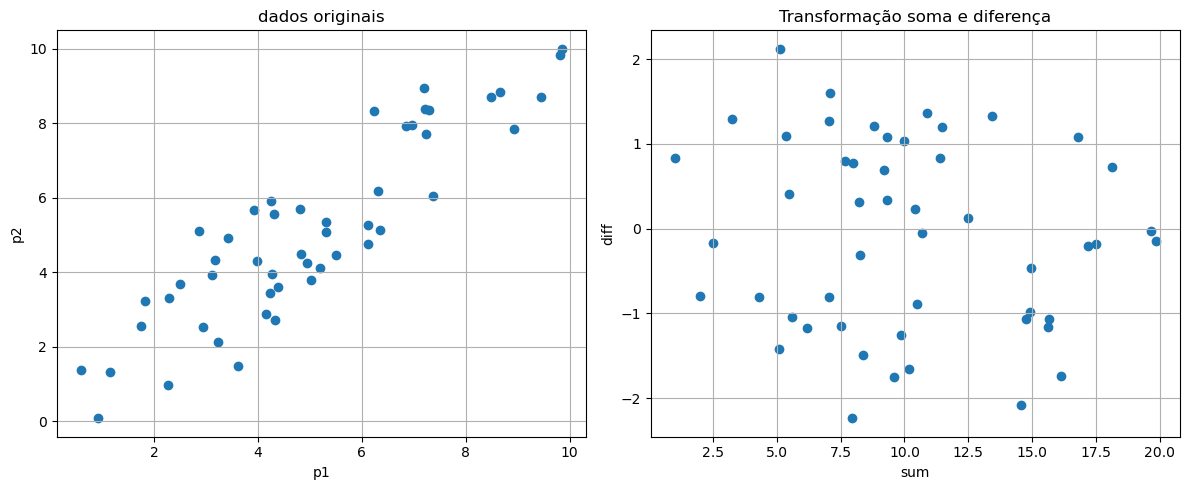

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['p1'], df['p2'])
plt.title('dados originais')
plt.xlabel('p1')
plt.ylabel('p2')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df_soma_dif['sum'], df_soma_dif['diff'])
plt.title('Transformação soma e diferença')
plt.xlabel('sum')
plt.ylabel('diff')
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
corr_soma_dif = df_soma_dif['sum'].corr(df_soma_dif['diff'])
corr_soma_dif


-0.13347385411788837

A diferença visual entre usar a média em vez da soma está principalmente na escala do eixo x. A soma será duas vezes maior que a média, pois estamos somando p1 e p2 diretamente em vez de calcular sua média. No entanto, a correlação entre soma e diferença deve ser a mesma que entre média e diferença. Isso ocorre porque a soma é apenas uma versão escalonada da média (soma = 2 * média).